In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Define function to integrate

In [2]:
def dfdx(x,f):
    return x**2 + x

## Define its integral

In [3]:
def f_int(x,C):
    return (x**3)/3. + 0.5*x**2 + C

## Define 2nd order RK method

In [5]:
def rk2_core(x_i,f_i,h,g):
    
    #advance f by a step h
    
    #half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    #full step
    f_ipoh = f_i + h*g(x_ipoh,f_ipoh)
    
    return f_ipoh

## Define wrapper routine for RK2

In [10]:
def rk2(dfdx,a,b,f_a,N):
    
    #dfdx is the derivative wrt x
    #a is the lower bound
    #b is the upper bound
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #define our steps 
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a    #value of f at a
    
    #evolve f along x
    for i in range(1,N):
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

## Define 4th order RK method

In [16]:
def rk4_core(x_i,f_i,h,g):
    
    #define x at 1/2 step
    x_ipoh = x_i + 0.5*h
    
    #define x at 1 step
    x_ipo = x_i + h
    
    #advance f by a step h
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh,f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh,f_i + 0.5*k_2)
    k_4 = h*g(x_ipoh,f_i + k_3)
    
    f_ipoh = f_i + (k_1 + 2*k_2 + 2*k_3 + k_4)/6.
    
    return f_ipo

## Define wrapper for RK4

In [17]:
def rk4(dfdx,a,b,f_a,N):
    
    #dfdx if the derivative wrt x
    #a is the lower bound
    #b is the upper limit
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #define our steps
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a    #value of f at a
    
    #evolve f along x
    for i in range(1,N):
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f
    

## Perform the integration

Text(0, 0.5, 'f(x)')

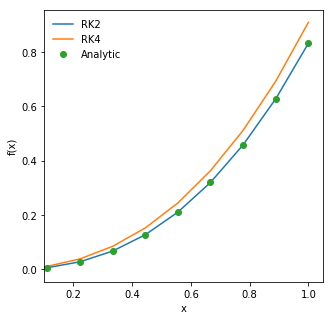

In [31]:
a = 0.0
b = 1.0
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
fig = plt.figure(figsize=(5,5))
plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)
plt.xlim((0.1))
plt.xlabel('x')
plt.ylabel('f(x)')

## Plot error

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'f(x)')

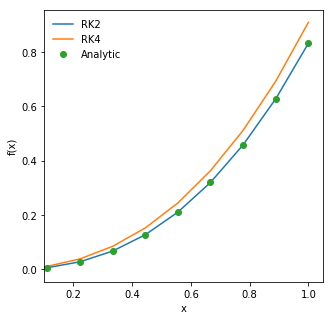

In [28]:
a = 0.0
b = 1.0
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx,a,b,f_a,N)
x_4, f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
f_analytic = f_int(x,f_a)

error_2 = (f_2 - f_analytic)/f_analytic
error_4 = (f_4 - f_analytic)/f_analytic

fig = plt.figure(figsize=(5,5))
plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)
plt.xlim(0.1)
plt.xlabel('x')
plt.ylabel('f(x)')